# 1. Descripción del problema

El problema a tratar en este informe es un problema de optimización llamado **corte de varillas**. El cual consiste en que, dada una vara de un material $x$, a la cual se le pueden aplicar ciertos cortes de distinto tamaño, cada uno con precio determinado, se debe maximizar la ganancia posible con respecto a los cortes que se le realicen a la vara, y la longitud de los pedazos resultantes de esta.  

**Entrada:** Varilla de largo $n$, lista de precios para cada corte de tamaño $i$.

**Salida**: Valor máximo posible de ganancia obtenida, cantidad de cortes necesarios para conseguir aquel valor.

**Tamaño del problema:** El tamaño para este problema viende definido por el tamaño $n$ de la varilla, debido a que mientras más largo, mayor combinaciones de cortes a analizar.


<a href="https://imgur.com/vhtBZnL"><img src="https://i.imgur.com/vhtBZnL.jpg" title="source: imgur.com" /></a>

A lo largo de este informe, se revisarán dos opciones de algoritmo para llegar a la solución final esperada. En primer lugar una opción mediante un algoritmo **recursivo**, y en segundo, un algoritmo que utilice el paradigma de **programación dinámica**.

# 2. Algoritmos


## 2.1 Opción recursiva

### 2.1.1 Descripción

Esta opción, de manera parecida a otros algoritmos que se han revisado, utiliza una **función recursiva** para resolver el problema, es decir que propone un caso base del problema, y para los otros casos aplica sobre estos el mismo algoritmo. Esto para llegar finalmente a la solución buscada.

La función de recurrencia es de la siguiente manera:

\begin{equation}
V(n) = \begin{cases}
  0  & \text{si } n = 0 \\
  max(p[n], p[i] + V(n-i)) & \text{si } n \geq 1
\end{cases}
\end{equation}

Esto quiere decir que el algoritmo tiene dos tipos de comportamiento según su entrada. Por un lado, si la varilla a analizar es de tamaño $0$ se retornará el valor $0$, este sería nuestro caso base. Mientras que en caso de recibir una varilla de tamaño mayor a $1$, se retornará el valor máximo entre dos opciones:

1. La varilla entera sin cortes.
2. Un corte de tamaño $i$, más el máximo valor posible de conseguir para el resto de la varilla.

Este algoritmo consigue este funcionamiento mediante el análisis de todos los tipos de cortes posibles a la varilla. Realizando los siguientes pasos.

1. Se recorre todo el arreglo de precios, y se realizan sucesivamente cortes de tamaño $i$, los cuales se van haciendo cada vez más grandes hasta llegar al tamaño $n$ de la varilla. 

2. Para el resto de la varilla que queda luego de realizar un corte $i$, se aplica el mismo algoritmo recursivamente para conseguir el valor máximo posible de esta otra parte. 

3. Así, se va guardando y actualizando el valor máximo encontrado, para después retornarlo.

La **sub-estructura óptima** de este algoritmo está dada por las opciones mencionadas anteriormente, es decir el decidir si cortar o no la varilla en varias partes. A continuación se muestra una ilustración de esta sub-estructura mencionada.

<a href="https://imgur.com/jyE3WO7"><img src="https://i.imgur.com/jyE3WO7.jpg" title="source: imgur.com" /></a>

### 2.1.2 Código

In [3]:
cont = 0

def corteVarillas(precios, n, verbose):
	global cont
	cortes = []

	cont += 1
	if(n <= 0):
		return 0, cortes #En caso de tener un largo de varilla 0, se retorna el valor 0

	valorMax = -9999999  #Valor mínimo arbitrario para almacenar los futuros valores posibles

	for i in range(1, n + 1):
		aux, cortesAux = corteVarillas(precios, n-i, verbose)
	 
		valorActual = precios[i - 1] + aux

		if verbose == True:
			print("Calculando opciones de: " + "\033[31m" + str(n) + "\033[0m")
			print("[Tamaño]/Valor de la primera mitad: " + " \033[33m" +"["+ str(i) + "]/"+ str(precios[i-1]) + "\033[0m")
			print("[Tamaño]/Valor de la segunda mitad: " + " \033[34m" + str(cortesAux) + "/" + str(aux) + "\033[0m")
			print("Se calculó precio máximo de la segunda mitad de Tamaño: " + " \033[34m" + "[" + str(n-i) + "]" + " y se retornó: " + str(aux) + "\033[0m")
			print("Valor para la opción: " +" \033[35m"+ "["+ str(i) + "] + " +"[" + str(n-i) + "] : " + str(valorActual) + "\033[0m\n")
	 
		if valorActual > valorMax:
			valorMax = valorActual
			cortes = cortesAux

			cortes.append(i)
	
	if(verbose == True):
				print("\033[32m" + "Se retorna finalmente Tamaño(s)/Valor óptimos encontrados para " + str(n) + ": " + str(cortes) +"/"+ str(valorMax) + "\033[0m\n")
	return valorMax, cortes
 

precios = [1, 5, 8, 9, 10]
verbose = False
print("Precios", precios, end = '')
print(" Largo de varilla: ", len(precios))

valorMax, cortes = corteVarillas(precios, len(precios), verbose)

print("Valor máximo: ", valorMax)
print("Llamadas recursivas:", cont)
print("Se necesitan " + str(len(cortes)) + " varillas de largo:")
for i in range(len(cortes)):
  print (str(cortes[i]) + "/", end ='')
print(" Respectivamente")

Precios [1, 5, 8, 9, 10] Largo de varilla:  5
Valor máximo:  13
Llamadas recursivas: 32
Se necesitan 2 varillas de largo:
3/2/ Respectivamente


Las variables relevantes son:

* `valorMax`, la cual almacena la mayor ganancia posible encontrada.
* `i`, presente en el ciclo `for`, el cual representa el largo del corte que se está realizando.

### 2.1.3 Ejemplo

Para el ejemplo utilizado en el código anteriormente mencionado, se entrega a la función una lista de precios `[1, 5, 8, 9, 10, 17, 17, 20]`, compuesta por $8$ valores, junto con un largo de varilla de $8$.

Así, el algoritmo nos retorna que el valor máximo posible que se puede conseguir como beneficio es de $22$, el cual se consigue realizando un corte, dejando dos varillas de tamaño $2$ y $6$ respectivamente, como se muestra en la siguiente ilustración.

<a href="https://imgur.com/po5lPnv"><img src="https://i.imgur.com/po5lPnv.jpg" title="source: imgur.com" /></a>

### 2.1.4 Ejecución del código con opción verbose

In [169]:
from random import *

precios = [1, 5, 8, 9, 10]
verbose = True
print("Precios", precios, end = '')
print(" Largo de varilla: ", len(precios))

valorMax, cortes = corteVarillas(precios, len(precios), verbose)

print("Valor máximo: ", valorMax)
print("Llamadas recursivas:", cont)
print("Se necesitan " + str(len(cortes)) + " varillas de largo:")
for i in range(len(cortes)):
  print (str(cortes[i]) + "/", end ='')
print(" Respectivamente")

Precios [1, 5, 8, 9, 10] Largo de varilla:  5
Calculando opciones de: 1
[Tamaño]/Valor de la primera mitad:  [1]/1
[Tamaño]/Valor de la segunda mitad:  []/0
Se calculó precio máximo de la segunda mitad de Tamaño:  [0] y se retornó: 0
Valor para la opción:  [1] + [0] : 1

Se retorna finalmente Tamaño(s)/Valor óptimos encontrados para 1: [1]/1

Calculando opciones de: 2
[Tamaño]/Valor de la primera mitad:  [1]/1
[Tamaño]/Valor de la segunda mitad:  [1]/1
Se calculó precio máximo de la segunda mitad de Tamaño:  [1] y se retornó: 1
Valor para la opción:  [1] + [1] : 2

Calculando opciones de: 2
[Tamaño]/Valor de la primera mitad:  [2]/5
[Tamaño]/Valor de la segunda mitad:  []/0
Se calculó precio máximo de la segunda mitad de Tamaño:  [0] y se retornó: 0
Valor para la opción:  [2] + [0] : 5

Se retorna finalmente Tamaño(s)/Valor óptimos encontrados para 2: [2]/5

Calculando opciones de: 3
[Tamaño]/Valor de la primera mitad:  [1]/1
[Tamaño]/Valor de la segunda mitad:  [2]/5
Se calculó precio

Las impresiones en caso de que la opción verbose esté activada ilustran lo que va sucediendo con el arreglo según el funcionamiento descrito, se nos muestra cómo se calcula cada opción y finalmente se retorna la que supone una mayor suma.

Es importante recalcar que cada cierta iteración, se vuelven a calcular valores máximos ya obtenidos para la segunda mitad. Es por esto que por ejemplo cuando se imprime por pantalla que se están calculando las opciones para el tamaño `5`, vuelve a aparecer que se calculan opciones de números menores, junto con todos los pasos que eso conlleva, para luego volver a la iteración donde se estaban calculando las opciones de `5`, lo cual coincide con el mensaje que indica que se calculó el valor máximo para la segunda mitad. 

Lo anteriormente descrito es debido a que para el cálculo del valor máximo de la segunda mitad, se aplica la función de manera recursiva hasta llegar a un caso base y poder volver a la iteración que llamó a la función en primera instancia.

## 2.2 Opción con programación dinámica bottom-up



### 2.2.1 Descripción



Para esta opción, se aplicará el paradigma de **programación dinámica**, el cual consiste en dividir un problema de tamaño $n$, en una cierta cantidad de sub-problemas de tamaño $m < n$, los cuales deberían ser relativamente más "fáciles" de solucionar que el problema original. Posteriormente  se almacenan las resoluciones de cada uno de estos en una tabla, la cual es consultada cuando para resolver un sub-problema $a$ sea necesario un resultado de un sub-problema $b$ previamente calculado. 

De esta manera estos algoritmos son más eficientes en tiempo que los algoritmos recursivos, que tienden a ser peores en rendimiento cuando los problemas se **traslapan**, es decir que comparten resoluciones.

Adicionalmente a esto, tenemos que esta segunda opción utiliza la programación dinámica con una planificación **bottom-up**, es decir que va solucionando los problemas de menor tamaño, y guarda sus resoluciones para que sean ocupadas para resolver los sub-problemas de mayor tamaño.

Para este problema en específico la cantidad de sub-problemas a resolver depende de el tamaño $n$ de la varilla, debido a que se deben encontrar los máximos cortes posibles para cada largo hasta llegar al largo $n$ de la varilla.

A continuación se muestra una imágen para entender esta relación:

<a href="https://imgur.com/NTceSky"><img src="https://i.imgur.com/NTceSky.jpg" title="source: imgur.com" /></a>

Se puede observar que para un problema original de tamaño $4$, se divide en sub problemas de tamaño $0, 1, 2, 3$, los cuales dependen a su vez de las soluciones de los problemas anteriores.

Es importante notar que el problema de tamaño $0$, no depende de ningún sub-problema anterior, por lo que representa nuestro caso base y nuestro primer elemento de la tabla que almacena las soluciones de problemas anteriores.



### 2.2.2 Código

In [15]:
def corteVarillasDin (precios, n, verbose):
  r = [0 for i in range(n+1)] #Arreglo auxiliar para almacenar soluciones de problemas anteriores
  cortes = [[0]]*(n+1)
  
  for i in range(1, n+1):
    valMax = -99999999
    if verbose == True:
      print("\033[31m" + "Calculando opciones para " + str(i) + ": " + "\033[0m")
    for j in range(i):
      if verbose == True:
          print("Tamaño de la primera mitad " + "\033[34m" + str(j+1) + "\033[0m")
          print("Tamaño de la segunda mitad: "+ "\033[33m" + str(i-(j+1)) + "\033[0m")
          print("Valor para esta opción: " + "\033[35m" + str(precios[j] + r[i-j-1]) + "\033[0m")

      if valMax < precios[j] + r[i-j-1]:
        valMax = precios[j] + r[i-j-1]
        cortesAux = cortes[i-j-1].copy()
        cortesAux.append(j+1)

    cortes[i] = cortesAux.copy()
    r[i] = valMax
    if(verbose == True):
      print("Valor máximo encontrado para " + str(i) + ": " + "\033[92m" + str(r[i]) + "\033[0m")
      print("Largo de cortes óptimos encontrados para " + "\033[31m" + str(i) + "\033[0m" + ": " +  "\033[92m" + str(cortes[i]) + "\033[0m")

  return r[n], cortes[i]

precios = [1, 5, 8, 9, 10]

print("Precios: ", precios, end = '')
print(" Largo de varilla: ", len(precios))

valMax, cortes = corteVarillasDin(precios, len(precios), False)
 
print("Valor máximo: ", valMax)
cortes.pop(0)
print("Se necesitan " + str(len(cortes)) + " varillas de largo:")
for i in range(len(cortes)):
  print (str(cortes[i]) + "/", end ='')
print(" Respectivamente")

Precios:  [1, 5, 8, 9, 10] Largo de varilla:  5
Valor máximo:  13
Se necesitan 2 varillas de largo:
[3, 2]
3/2/ Respectivamente


Las variables relevantes son:

* `r`: Que es el arreglo donde se guardan las resoluciones obtenidas.
* `valMax`: Igual que en el caso recursivo, almacena el máximo valor encontrado.
* `i`: Presente en el primer ciclo for, el cual se ir aumentando el tamaño del primer corte de varilla.
* `j`: Variable que se encuentra en el segundo ciclo for, se encargará de consultar las soluciones encontradas para los problemas anteriores, presentes en `r`.

### 2.2.3 Ejemplo

El ejemplo utilizado es el mismo mostrado anteriormente:

<a href="https://imgur.com/po5lPnv"><img src="https://i.imgur.com/po5lPnv.jpg" title="source: imgur.com" /></a>

### 2.2.4 Ejecución con opción verbose

In [11]:
precios = [1, 5, 8, 9, 10]

print("Precios: ", precios, end = '')
print(" Largo de varilla: ", len(precios))

valMax, cortes = corteVarillasDin(precios, len(precios), True)
 
print("Valor máximo: ", valMax)
cortes.pop(0)
print("Se necesitan " + str(len(cortes)) + " varillas de largo:")
for i in range(len(cortes)):
  print (str(cortes[i]) + "/", end ='')
print(" Respectivamente")

Precios:  [1, 5, 8, 9, 10] Largo de varilla:  5
Calculando opciones para 1: 
Tamaño de la primera mitad 1
Tamaño de la segunda mitad: 0
Valor para esta opción: 1
Valor máximo encontrado para 1: 1
Largo de cortes óptimos encontrados para 1: [0, 1]
Calculando opciones para 2: 
Tamaño de la primera mitad 1
Tamaño de la segunda mitad: 1
Valor para esta opción: 2
Tamaño de la primera mitad 2
Tamaño de la segunda mitad: 0
Valor para esta opción: 5
Valor máximo encontrado para 2: 5
Largo de cortes óptimos encontrados para 2: [0, 2]
Calculando opciones para 3: 
Tamaño de la primera mitad 1
Tamaño de la segunda mitad: 2
Valor para esta opción: 6
Tamaño de la primera mitad 2
Tamaño de la segunda mitad: 1
Valor para esta opción: 6
Tamaño de la primera mitad 3
Tamaño de la segunda mitad: 0
Valor para esta opción: 8
Valor máximo encontrado para 3: 8
Largo de cortes óptimos encontrados para 3: [0, 3]
Calculando opciones para 4: 
Tamaño de la primera mitad 1
Tamaño de la segunda mitad: 3
Valor para e

A contraparte de la opción verbose de la forma recursiva, podemos observar cómo esta alternativa también calcula todos los casos posibles del largo indicado, sin embargo lo realiza una sola vez, a diferencia del algoritmo recursivo que calcula una y otra vez los mismos valores.

Lo anterior es gracias al diseño del algoritmo que va desde los tamaños más pequeños hasta los más grandes y guarda los resultados obtenidos para ser ocupados en el futuro, siguiendo el paradigma de programación dinámica.

# 3. Propidades del algoritmo

## 3.1 Correctitud

### 3.1.1 Teorema de correctitud del algoritmo Bottom-up

El algoritmo para resolver el problema de corte de varillas, dada una lista $[a_1,a_2, \ldots ,a_k]$, donde $k$ representa un tamaño determinado de una varilla, y $a_n$ un precio asociado a ese tamaño, el algoritmo retorna el mayor valor posible a obtener para una varilla de largo $n$.

**Prueba del teorema**

Para la comprobación de la correctitud del algortimo se utilizará el método de inducción, el cual ya ha sido explicado en informes anteriores.

**Caso base**

Cuando el tamaño de la varilla es $n=0$, el algoritmo inicializa un arreglo `r[0]` el cual tiene como único elemento un $0$. Este es el único valor posible de "corte" de la varilla, es debido a esta condición que trivialmente será el mayor beneficio posible y es el valor que se retornará.

**Paso inductivo**

Para tamaños más grandes, el algoritmo realiza combinaciones de cortes aumentando progresivamente el tamaño de la primera mitad, comenzando desde $1$, hasta llegar al tamaño total de la varilla. Es así como el algoritmo retorna el máximo entre dos valores: 

1. $P(n)$, el cual significa retornar la varilla sin cortes.
2. $P(i) + P(n-i)$, que es representa el valor que se consigue al realizar un corte de tamaño $i$ a la varilla, y sumarle el máximo valor posible al realizarle otros cortes al resto de la varilla de tamaño $(n-i)$.

En caso de que el máximo valor sea la varilla sin cortes, el algoritmo dispone de la lista de precios por lo cual accede facilmente al precio de ese tamaño de varilla y lo retorna.

Para el segundo caso, el algoritmo accede en primer lugar a la lista de precios ya mencionada, del cual accede al precio del corte de tamaño $i$, y le suma el acumulado de soluciones de tamaños menores a $n$ anteriormente calculadas, debido a que como se mencionó, el algoritmo resuelve desde los tamaños más pequeños hasta los más grandes.

Finalmente, se retorna la opción que representa el mayor beneficio posible según el tamaño $n$.

## 3.2 Tiempo de ejecución de algoritmo Bottom-up

Para el tiempo de ejecución de este algoritmo, se debe analizar el comportamiento de este en el código.

Como se describió anteriormente, el algoritmo utiliza dos ciclos `for`, el primero que recorre la lista de precios de tamaño $n$, y el segundo que va desde $0$ hasta el tamaño $i$ del corte de la primera mitad.

Al tener dos ciclos `for` anidados uno dentro del otro, cuyas variables van en un rango de $1$ ó $0$ hasta $n$, tenemos que el tiempo de ejecución del algoritmo es del orden $O(n^2)$.

# 4. Experimentos

## 4.1 Comparación entre alternativas

En el siguiente experimento se ilustrará cómo se comportan los tiempos de ejecución de cada alternativa del algoritmo (recursiva/bottom-up), a medida que el tamaño del problema crece.

### Tiempo de ejecución de Bottom-up

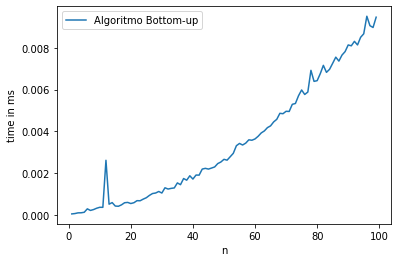

In [7]:
import matplotlib.pyplot as plt
import datetime
import random
from timeit import repeat

def cutrod_instance_generator(N):
  A = []
  prev = 0
  for i in range(N):
    r=random.randint(0,10)
    A.append(prev+r)
    prev+=r
  return A

x = []; y1 = [] ; y2 = []

for n in range(1,100):

  A = cutrod_instance_generator(n)

  t = repeat(setup="from __main__ import corteVarillasDin", stmt=f"corteVarillasDin({A}, {len(A)}, {False})", repeat=1, number=10)

  x.append(n)
  y1.append(t)


plt.plot(x,y1)
plt.legend(["Algoritmo Bottom-up"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

### Tiempo de ejecución opción recursiva

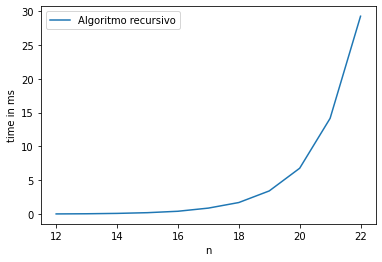

In [10]:
x = []; y1 = [] ; y2 = []

for n in range(12,23):

  A = cutrod_instance_generator(n)

  t = repeat(setup="from __main__ import corteVarillas", stmt=f"corteVarillas({A}, {len(A)}, {False})", repeat=1, number=10)

  x.append(n)
  y1.append(t)


plt.plot(x,y1)
plt.legend(["Algoritmo recursivo"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

### Conclusiones

Luego de analizar ambos gráficos, es importante prestar atención a la medida en la que están los tiempos de ejecución, mientras el algoritmo de programación dinámica tiene una medida de tiempo en números decimales en el eje y, siendo el tiempo más lento $0.008-0.010 [ms]$. Por otro lado el algoritmo recursivo va desde los $0 [ms]$ a los $30[ms]$ con un crecimiento muy pronunciado a partir del tamaño de problema número $18$.

Esto se condice con las complejidades temporales teóricas de cada alternativa, debido a que como se mencionó en el punto anterior, la estrategia Bottom-up tiene una cota asintótica de $O(n^2)$, la cual se ve en su gráfica con una curva de crecimiento cuadrática. Mientras que el algoritmo recursivo realiza un total de $2^n$ comparaciones, siendo esa su complejidad temporal, la cual es bastante alta y exponencial, tal como se ve en la gráfica adjunta.

Cabe destacar finalmente que al momento de generar los gráficos, Google Collab tardó menos de $2 [s]$ en generar el primer gráfico, y algo más de $2 [min]$ en generar el segundo, demostrando nuevamente la diferencia de complejidad temporal entre estas dos alternativas.

## 4.2 Comparación entre cantidad de sub-problemas/llamadas recursivas

Finalmente se compararán ya no el tiempo medido por computadora sino el contador de llamadas recursivas presente en la implementación del algoritmo recursivo, con respecto a la cantidad de sub-problemas que se deben resolver para el algoritmo bottom-up, mencionada anteriormente en la descripción del algoritmo.

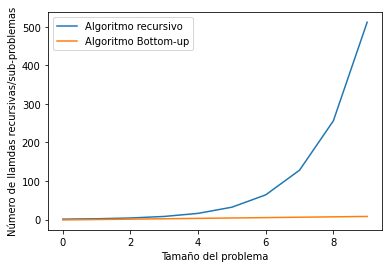

In [19]:
import matplotlib.pyplot as plt
import math

x = [n for n in range(0,10)] 
y1 = [(n-1) for n in range(0,10)] 

y = []

for n in range(0,10):
  A = cutrod_instance_generator(n)
  cont = 0
  aux, cortes = corteVarillas(A, len(A), False)
  y.append(cont)

plt.plot(x,y)
plt.plot(x,y1)

plt.legend(["Algoritmo recursivo", "Algoritmo Bottom-up"])

plt.xlabel('Tamaño del problema')
plt.ylabel('Número de llamdas recursivas/sub-problemas')
plt.show()

En este último gráfico se puede observar con mayor claridad como la proporción del tamaño del problema sobre el tiempo es lineal para el algoritmo Bottom-up, mientras que para el algoritmo recursivo es una relación exponencial, logrando llegar incluso hasta más de las 512 llamadas recursivas para un tamaño de problema mayor a 8.